# Chapter 6: Bayesian Model fitting II

##By M.Killinger, F.Meissner, K.Li

# Exercises

In [18]:
%pylab inline
import numpy as np
from scipy import stats


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


## Exercise 1 (20 points)

You have a set of $n$ data points, $\{x_i\}$, which have been drawn from a Gaussian distribution of known mean $\mu$, and unknown variance, $\sigma^2$
We want to find the posterior PDF over the variance. Show that when you adopt the following prior for the variance

$$p(\sigma^2 | \alpha, \beta) = \frac{1}{Z} \sigma^{-2 \alpha - 2} \exp\left(-\frac{\beta}{\sigma^2}\right)$$

the posterior is conjugate with this prior ($\alpha > 0$ and $\beta>0$). Write down all of your steps.

**Assumption** Gaussian likelihood (note $x=(x_{1},....,x_{n})$ and $\sigma=(\sigma_{1},....,\sigma_{2})$):
$$ N(x|\mu,\sigma)=\frac{1}{\sqrt{2 \pi}\sigma} \exp\left(-\frac{(x-\mu)^{2}}{2\sigma^{2}} \right)$$

We want to assume, that each measurement is independent from the rest which allows for the factorization of the probabilities. Additionally we assume $\sigma_{i}=\sigma \quad \text{(f.a. $i$, note $\sigma$ is an unknown! parameter)}$:

$$N(x|\mu,\sigma)=\prod_{i} \frac{1}{\sqrt{2 \pi}\sigma_{i}}  \exp\left(-\frac{(x_{i}-\mu)^{2}}{2\sigma_{i}^{2}} \right) = 
\frac{1}{\sqrt{2 \pi}\sigma^{n}}  \prod_{i}  \exp\left(-\frac{(x_{i}-\mu)^{2}}{2\sigma^{2}} \right)
$$ 

As usual, we obtain the posterior as the product of the prior with the likelihood pdf:

$$ p(\sigma^{2}|x,\mu)=\underbrace{\frac{1}{Z} \cdot \frac{1}{2 \sqrt{\pi}}}_{1/\tilde{Z}} \sigma^{-2 \alpha - 2 -n} \exp\left(-\frac{\beta+ 1/2 \sum_{i}(x_{i}-\mu)^{2}}{\sigma^{2}} \right) $$

As we can see, this posterior has the same form as the prior which shows that both are conjugate to each other. Thus, we can easily figure out, how the prior coefficients $\alpha$ and $\beta$ get 'updated' by the measurements:
$$ 
\alpha_{\text{posterior}} = \alpha_{\text{prior}} + n/2
$$

$$
\beta_{\text{posterior}} = \beta_{\text{prior}} + 1/2 \sum_{i} (x_{i}-\mu)^{2}
$$

## Exercice 2 (35 points)

We revisit the exercise of the lighthouse, but this time we will completely solve the problem in 2 dimensions.

**Recall of the problem**: A lighthouse is somewhere off a piece of straight coastline at a position $x$ along the shore and a distance $y$ out at sea. It emits short flashes (perfectly collimated) at random times and hence at random azimuths, $\theta$, from its position, _i.e._, $p(\theta) = constant$. You see these flashes on the coast while walking along the shore. You record your position $D_k$ along the coastline at the instant you see a flash, but you do not record the direction the flash came from.

* the dataset of $\{D_k\}$ is in the file `lighthouse.dat`. (Same dataset as before) 
* All distances are in $km$.

We assume (prior information) that the lighthouse is constrained to be located within the rectangle $-2 < x < 2$ , $0 < y < 2$ , with uniform prior, where $x=0$ coincides with $D=0$.

Below is a schematic to help you understand the situation.

In [19]:
from IPython.display import Image
Image('lh_schema.png')

In the previous episode of this exercise, we worked out the posterior probability distribution $p(y|x, \{D_k\}$ of the lighthouse. Now, we work out $p(x, y | \{D_k\}$.

From the information given, $\theta_k$ for any $k$-th flash must lie between $-\pi/2$ and $+\pi/2$ radians, so the prior for the $k$-th flash is:
$$ p(\theta_k | x, y) = \frac{1}{\pi}$$

And from elementary trigonometry, we can write:
$$ y \tan(\theta_k) = D_k − x$$

A the variable transformation leads to write the likelihood of a single $D_k$ as
$$p( D_k | x,y) = \frac{y/\pi}{(D_k - x)^2 + y^2}$$

This tells us that the probability that the $k$-th flash will be recorded at position $D_k$ , given the coordinates of the lighthouse $(x, y)$, is given by a Cauchy distribution in $D_k$.

Assuming the flashes independent, thus the positions $\{D_k\}$ are also independent, the posterior of the position is

$$p(x, y | \{D_k\}) = \frac{1}{Z} p( \{D_k\} | x,y)p(x, y) = \frac{1}{Z} \prod_k \frac{y/\pi}{(D_k - x)^2 + y^2}$$

with $Z$ is the posterior normalization constant.

Inferring the position of the lighthouse from the data involves the estimation of both $x$ and $y$. This exercise will show you that from a one dimensional dataset, and a correct model definition, one can infer two dimensional information about the lighthouse.

We will use the tools you learned from the lectures so far, however many procedures exist and new methods will be learned in later chapters. In this exercise in particular, you should evaluate the necessary integrals just by summing on a regular, dense grid.

1. Gridding the values: Grid the $(x,y)$ space allowed by your prior with a sensible step size and compute at each point the posterior value $p(x, y |\{D_k\})$. Be aware of the influence of your stepsize, make a sensible choice (you may need to adjust it in the following steps). Plot the 2D posterior PDF using sensible contours or a grey scale. Make sure you label you contours or shades of grey, otherwise they are meaningless! Make an initial estimate of the position $(x_{max}, y_{max})$ of the lighthouse based on the peak of your map (mode).
    
2. Marginal distributions: write down the expressions for both marginal distributions $p(x|\{D_k\})$, and $p(y|\{D_k\})$. Evaluate them numerically on the grid, and plot them. Write down the theoretical expressions for the means (expectation values), $E[x]$ and $E[y]$, and standard deviations, $\sigma_x$ and $\sigma_y$, for the two distributions, as well as their numerical approximations using the grid, and evaluate them (give the four numerical values).On top of your both marginal posterior distributions, plot a Gaussian of mean $E[x]$, $E[y]$ and standard deviation $\sigma_x$, $\sigma_y$, respectively. How well do these estimates agree with $(x_{max}, y_{max})$, given the width of the distribution? Explain potential source of differences.
    
3. Do a quadratic approximations of the 2d posterior distribution $p(x, y |\{D_k\})$, around the peak value $(x_{max}, y_{max})$. Work out (analytically) the necessary partial derivatives, showing all your steps. Using the covariance matrix of your approximation, plot the approximative 1-$\sigma$ and $3-\sigma$ contours on top of the posterior distribution. Compare your result with the ones from the previous question. Why might they differ?

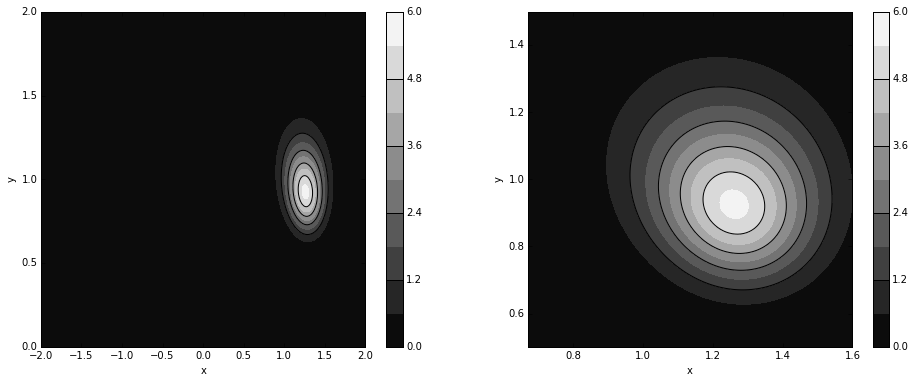

y_max is 0.928
x_max is 1.264


In [2]:
import numpy as np       # numerical package
from scipy import stats  # most of the common distributions
import matplotlib.pyplot as plt      # matplotlib plotting library
%matplotlib inline

data = np.loadtxt("lighthouse.dat")
#the target function
def pstar(x,y):
    return np.prod(y/((data-x)**2+y*y))*7.1694478044133306e+36 #run once in advanced and got the normalization term


grid = []
nstep = 500
# y = (row+1)*2/nstep
for row in range(nstep):
    grid.append([])
    # x = (column+1)*4/nstep-2
    for column in range(nstep):
        grid[row].append(pstar((column+1)*4/float(nstep)-2,(row+1)*2/float(nstep)))
grid = np.asarray(grid)
x = np.linspace(-2.0, 2.0, nstep)
y = np.linspace(0.0, 2.0, nstep)
X, Y = np.meshgrid(x, y)

#normalize
#print nstep*nstep/(np.sum(grid)*8)     
plt.figure(figsize=(16,6))
plt.gray()
plt.subplot(121)
CS = plt.contourf(X, Y, grid, 10,origin='lower')
CS2 = plt.contour(CS, levels=CS.levels[::2],colors = 'k',origin='lower')
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar(CS)
cbar.add_lines(CS2)

plt.subplot(122)
xl=int(nstep/4.); xh = int(nstep*3/4.); yl = int(nstep*2/3.); yh = int(0.9*nstep);
CS = plt.contourf(X[xl:xh,yl:yh],Y[xl:xh,yl:yh], grid[xl:xh,yl:yh],10,origin='lower')
CS2 = plt.contour(CS, levels=CS.levels[::2],colors = 'k',origin='lower')
plt.xlabel('x')
plt.ylabel('y')
cbar = plt.colorbar(CS)
cbar.add_lines(CS2)
plt.show()

print( 'y_max is '+str((np.where(grid==np.max(grid))[0][0]+1)*2/float(nstep)))
print( 'x_max is '+str((np.where(grid==np.max(grid))[1][0]+1)*4/float(nstep)-2))

**Question 1:** The contour figures are above, the left is the total one, the right is the one zoomed in, the mode is (1.264, 0.928) for (x,y). Totally 500*500 meshgrid point.

For x: the mean is 1.24965492046
the deviation is 0.171215224743
FWHM is 0.403181043238
For y: the mean is 0.9918171177
the deviation is 0.184527442452
FWHM is 0.434528920345


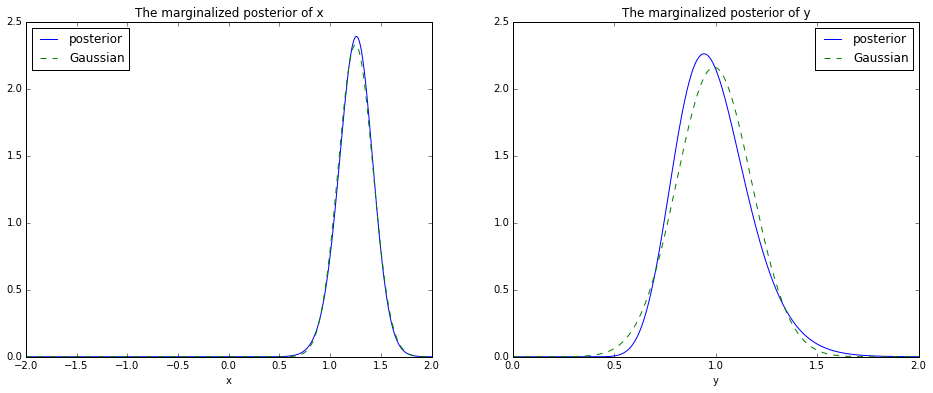

In [3]:
#the target function
def pstar(x,y):
    return np.prod(y/((data-x)**2+y*y))


grid = []
nstep = 500
# y = (row+1)*2/nstep
for row in range(nstep):
    grid.append([])
    # x = (column+1)*4/nstep-2
    for column in range(nstep):
        grid[row].append(pstar((column+1)*4/float(nstep)-2,(row+1)*2/float(nstep)))

marx = np.sum(grid,axis=0)
#normalize
nmarx = marx*nstep/(np.sum(marx)*4)
x = np.linspace(-2,2,nstep)        
plt.figure(figsize=(16,6))
plt.subplot(121)
plt.plot(x,nmarx,label="posterior")
plt.title("The marginalized posterior of x")
plt.xlabel("x")

e = 0
for i in range(len(x)):
    e = e+x[i]*nmarx[i]*4/float(nstep)
print("For x: the mean is "+str(e))

var = 0
for i in range(len(x)):
    var += nmarx[i]*(x[i]-e)**2*4/float(nstep)
sigma = np.sqrt(var)
print( "the deviation is "+str(sigma))
print("FWHM is "+str(2*np.sqrt(2*np.log(2))*sigma))

gau = stats.norm.pdf(x,e,sigma)
plt.plot(x, gau, '--', lw=1,label="Gaussian")
plt.legend(loc = 2)

mary = np.sum(grid,axis=1)
#normalize
nmary = mary*nstep/(np.sum(mary)*2)
y = np.linspace(0,2,nstep)        
plt.subplot(122)
plt.plot(y,nmary,label="posterior")
plt.title("The marginalized posterior of y")
plt.xlabel("y")

ey = 0
for i in range(len(y)):
    ey = ey+y[i]*nmary[i]*2/float(nstep)
print( "For y: the mean is "+str(ey))

vary = 0
for i in range(len(y)):
    vary += nmary[i]*(y[i]-ey)**2*2/float(nstep)
sigmay = np.sqrt(vary)
print( "the deviation is "+str(sigmay))
print( "FWHM is "+str(2*np.sqrt(2*np.log(2))*sigmay))

gau = stats.norm.pdf(y,ey,sigmay)
plt.plot(y, gau, '--', lw=1,label="Gaussian")
plt.legend()

**Question 2:** The marginlized postorier is:
$$P^\ast(x|{D_k})=\int_0^2 P(x,y|{D_k})dy=\int_0^2 \prod_k \frac{y/\pi}{(D_k - x)^2 + y^2}dy$$
$$P^\ast(y|{D_k})=\int_{-2}^2 \prod_k \frac{y/\pi}{(D_k - x)^2 + y^2}dx$$
And the plot is the solid line above.

The equations for mean and deviation are:
$$\bar x = \int_{-2}^2 x\prod_k \frac{y/\pi}{(D_k - x)^2 + y^2}dx$$
$$\bar y = \int_{0}^2 y\prod_k \frac{y/\pi}{(D_k - x)^2 + y^2}dy$$
$$\sigma_x^2 = \int_{-2}^2 (x-\bar x)^2\prod_k \frac{y/\pi}{(D_k - x)^2 + y^2}dx$$
$$\sigma_y^2 = \int_{0}^2 (y-\bar y)^2\prod_k \frac{y/\pi}{(D_k - x)^2 + y^2}dy$$

Their values are following: For x, the mean is 1.249, 
the deviation is 0.171, 
FWHM is 0.403, 
For y: the mean is 0.991, 
the deviation is 0.184, 
FWHM is 0.434.
The estimate  (1.249, 0.991) are close to the peak in question 1 but different, and the possible reasons for that is the same as the last sheet: the nonsymmetry account for a differ between mode and mean, for the value of x, the PDF is almost symmetric and these two values are closer.

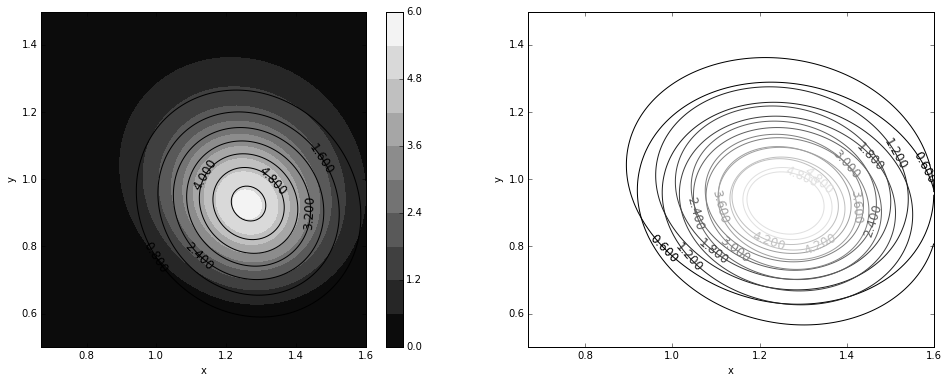

In [4]:
def ddy(x,y):
    return np.sum(-1/(y*y)-(2*(data-x)**2-2*y*y)/((data-x)**2+y*y)**2)
def ddx(x,y):
    return np.sum((2*(data-x)**2-2*y*y)/((data-x)**2+y*y)**2)
def ddxy(x,y):
    return np.sum((-4*(data-x)*y)/((data-x)**2+y*y)**2)
#the target function
def pstar(x,y):
    return np.prod(y/((data-x)**2+y*y))*7.1694478044133306e+36
    
grid = []
nstep = 500
# y = (row+1)*2/nstep
for row in range(nstep):
    grid.append([])
    # x = (column+1)*4/nstep-2
    for column in range(nstep):
        grid[row].append(pstar((column+1)*4/float(nstep)-2,(row+1)*2/float(nstep)))
grid = np.asarray(grid)

px = 1.264
py = 0.928

zcov = 1/(ddx(px,py)*ddy(px,py)-ddxy(px,py)**2)
rv = stats.multivariate_normal([px, py], [[-ddy(px,py)*zcov, ddxy(px,py)*zcov], [ddxy(px,py)*zcov, -ddx(px,py)*zcov]])
x = np.linspace(-2.0, 2.0, nstep)
y = np.linspace(0.0, 2.0, nstep)
X, Y = np.meshgrid(x, y)
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X 
pos[:, :, 1] = Y
gau = rv.pdf(pos)
 
xl=int(nstep/4.); xh = int(nstep*3/4.); yl = int(nstep*2/3.); yh = int(0.9*nstep);
plt.figure(figsize=(16,6))
plt.gray()
plt.subplot(121)
CS = plt.contourf(X[xl:xh,yl:yh],Y[xl:xh,yl:yh], grid[xl:xh,yl:yh], 10,origin='lower')
cbar = plt.colorbar(CS)
CS2 = plt.contour(X[xl:xh,yl:yh],Y[xl:xh,yl:yh], gau[xl:xh,yl:yh],colors = 'k',origin='lower')
plt.clabel(CS2, inline=False, fontsize=12)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(122)
CS = plt.contour(X[xl:xh,yl:yh],Y[xl:xh,yl:yh], grid[xl:xh,yl:yh],10,origin='lower')
plt.clabel(CS, inline=False, fontsize=12)
CS2 = plt.contour(X[xl:xh,yl:yh],Y[xl:xh,yl:yh], gau[xl:xh,yl:yh],10,origin='lower')
plt.clabel(CS2, inline=False, fontsize=12)
plt.xlabel('x')
plt.ylabel('y')

**Question 3:** The second derivatives are:
$$A=\frac{\partial^2 L}{\partial y^2}=\sum_i [-\frac{1}{y^2}-\frac{2(D_i -x)^2-2y^2}{((D_i -x)^2+y^2)^2}]$$
$$B=\frac{\partial^2 L}{\partial x^2}=\sum_i [\frac{2(D_i -x)^2-2y^2}{((D_i -x)^2+y^2)^2}]$$
$$C=\frac{\partial^2 L}{\partial x^2}=\sum_i [\frac{-4(D_i -x)y}{((D_i -x)^2+y^2)^2}]$$
Compute them using the above code and compute the covariant matrix: (It is crazy to show all the step !!! A rational one is to show the results.)
$$\sigma^2_{11}=\frac{-B}{AB-C^2}=0.0259,  \sigma^2_{12}=\frac{C}{AB-C^2}=-0.00300$$
$$\sigma^2_{21}=\frac{C}{AB-C^2}=-0.00300,  \sigma^2_{22}=\frac{-A}{AB-C^2}= 0.0287$$


Overplot the two contours figure is showed above (there is no one with total range not becuase of laziness, but that figure really don't shows clear things), for the left I plot the postorior by gray scale and the fitted quadratic gaussian by contour curves, the right is plotting two contour curves which is really not clear, plotting the $1-\sigma$ and $3-\sigma$ is worse when distinguish them, therefore I think the left is better, we can see their difference. 

The reasons are that the quadratic approximation only has second order precise, the high order makes the differences and of course there is a problem of symmetric as mentioned previously.

## Exercise 3 (45 points)

In this exercise, we will study a coin flipping problem, where instead of one coin, we will model the use of two.

Throughout this exercise, we will assume that a single coin flipping is  a random event that takes only 2 values: head or tail. In addition, we note $p$ the probability of getting a head on a single toss.

1) What statistical distribution could represent the single coin flipping process? Generate 1,000 flips of a fair coin  $(p=0.5)$ and for a biased coin ($p=0.2$). Produce an histogram for each case that illustrates the coin tossing behavior.

**This process is described by the Bernoulli distribution**

([<matplotlib.axis.XTick at 0x7fae4c1fa050>,
 <a list of 2 Text xticklabel objects>)

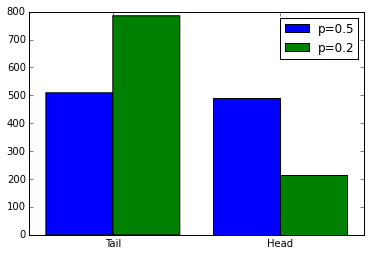

In [20]:
p_values = [0.5, 0.2]
# Head == 1, Tail == 0
samples  = np.zeros((2, 1000))
for i,p in enumerate(p_values):
   samples[i] = np.random.rand(1000) < p

plt.hist(samples.T, bins=2)
plt.legend(('p=0.5', 'p=0.2'), loc=0)
x = [1.0/4, 3.0/4]
ticks = ['Tail', 'Head']
plt.xticks(x, ticks)


2) Write down an analytic expression of the likelihood of a dataset of $N$ draws resulting of tossing a coin with an unknown $p$. Deduce the posterior probability distribution of $p$, where $p$ is the probability of getting head on one draw and detail your prior hypothesis.

**Drawing $N$ sample makes this a Binomial Process. Therefore the likelihood has the form of the Binomial distribution and as prior we chose the Beta distribution because it is conjugate and the range is suitable for a distribution over a probability. $k$ is the count of observed heads amongst the $N$ tosses**

$$ P(k|p,N) = \frac{1}{Z_l} p^k \cdot (1-p)^{N-k}$$

$$ P(p)   = \frac{1}{Z_p} p^{\alpha -1} \cdot (1-p)^{\beta -1}$$

$$ P(p|k,N) = \frac{1}{Z} p^{\alpha -1 + k } \cdot (1-p)^{\beta -1 + N -k}$$

You receive a dataset `coinflip.dat` and are told that this dataset contains some results of coin flipping in which $0$ means $tail$ and $1$ means $head$. However, you are given no information about the number of coins nor their probabilities $p_1, p_2, ..., p_k$. The following questions will guide you to whether you can find out the number of coins and their properties.

3) First, let's assume a single coin was used. Grid the values of $p$ and assuming a uniform prior, compute the posterior of $p$ on that grid. (make a sensible stepsize choice). Plot your result. Give an estimate of the value of $p$ and its uncertainty, and justify your choice of estimators.

p_mean= 0.582781456954 p_std= 0.0283278327247 p_var 0.00080246610688


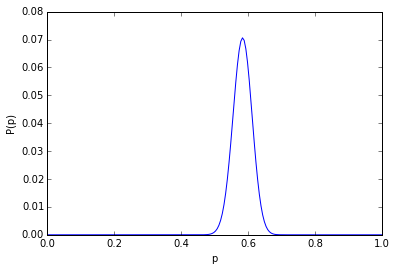

In [21]:
dataset = np.genfromtxt('coinflip.dat')
N = len(dataset)
k = np.sum(dataset)
p_grid = np.linspace(0,1, num=200)

posterior_uni = p_grid**k * (1-p_grid)**(N-k)
posterior_uni /= posterior_uni.sum()

expt_uni = (p_grid * posterior_uni).sum()
var_uni  = ((p_grid - expt_uni)**2 * posterior_uni).sum()
std      = np.sqrt(var_uni)

print "p_mean=",expt_uni,"p_std=",std,"p_var",var_uni

plt.plot(p_grid, posterior_uni)
plt.xlabel("p")
plt.ylabel("P(p)")

**The stepsize was raised to the point that the plot is visually smooth (compared to 100 steps the parameter estimates didn't change significantly anyway). We estimage the $p$ by the expectation 0.58 (which is in this case virtually identical to the mean) and the uncertainty is given by the standard deviation 0.028**

4) Now, let's build and test a 2 coin model. For this model, we need to assume the coins with unknown parameters ($p_1$, $p_2$) and that we do not know the ratio of number of tosses $r = n_1/n_2$ in the dataset. Without more information, we assume uniform prior on $r$. However, we can assume the join prior distribution of $p_1, p_2$ as:
\begin{eqnarray}
P(p_1, p_2) \propto & \\
&1 & if\ 0 \leq p_1 < p_2 \leq 1, \\
& 0 & otherwise
\end{eqnarray}
    
    4.1) Explain why this joint prior distribution is more suitable than a uniform prior on each of $p_1$ and $p_2$. Justify why we do not need a prior on the absolute number of tosses per coin. 
    
    4.2) Write down the likelihood of the data with this model. 
    
    4.3) Through gridding, compute the posterior distribution of the model, and plot the 3 joint distributions (each pair) and 3 marginalized ones. Describe what you observe and in particular give the most probable combination of ($p_1, p_2$) and the behavior of the model in the limit of $r$ goes to $0$ or $1$. 

** This definition of $r$ is sick because it diverges if no tosses came from coin 2 (i.e. the range of r is not bounded and the dependence is highly non-linear and asymmetric). A much more well behaved defition of r would be given by the condition $N = r n_1 + (1-r) n_2$. Because it is easier to use we stick to this in the follwing.**

** 1. Concerning the joint prior, as we cannot distinguish the coins we can say without loss of generality that $p_1$ is smaller than $p_2$. Otherwise we would have to consider two cases.
If we use a prior for $r$ and know $N$ a prior for the absolute number of tosses per coin is implicitly included in the prior over $r$.** 

** 2. We introduce the number of heads that the first coin scored $k_1$ (as a random variable, not parameter), and marginialise it by integration (note that $k_1 \leq n_1 = rN$ and $k_2 \leq n_2$, where the second condition is written by an Indicator function $\mathbb{I}$):
$$ P(k|p_1,p_2,r,N) = \frac{1}{Z_l}  \sum^{rN}_{k_1=0} p_1^{k_1}  (1-p_1)^{(rN-k_1)} \cdot p_2^{k-k_1}(1-p_2)^{((1-r)N-k+k_1)} \cdot \mathbb{I}(k-k_1 \leq (1-r)N)$$
Because integrating out $k_1$ is also analytically a discrete summation we make no integration error by doing this numerically**

** 3. Given this prior the posterior can be obtained from the likelihood by setting all points with $p_1 \gt p_2$ to zero. **

In [22]:
p1_grid = np.linspace(0,1, num=101)[:,None,None,None]
p2_grid = np.linspace(0,1, num=101)[None,:,None,None]
r_grid  = np.linspace(0,1, num=101)[None,None,:,None]
k1_grid = np.arange(0,k+1)         [None,None,None,:]
n1 = r_grid*N
n2 = (1-r_grid)*N
mask = (k1_grid <= n1) * (k-k1_grid <= n2) # conditions on k1 and k2, boolen mask array
# where conditions are not fulfilled we might get NaN, therefore we convert nan_to_num and set those nums
# to 0 by multiplying with a maks that is 0 where conditions are not fullfilled
p1_heads = p1_grid**k1_grid
p1_tails = np.nan_to_num((1-p1_grid)**(n1-k1_grid)) * mask 
p2_heads = p2_grid**(k-k1_grid)
p2_tails = np.nan_to_num((1-p2_grid)**(n2-k+k1_grid)) * mask

likelihood_duo = p1_heads * p1_tails * p2_heads * p2_tails
likelihood_duo = likelihood_duo.sum(axis=3) # integrate out k_1
prior          = np.tril(np.ones((101,101)), k=-1).T[:,:,None] # triangular matrix, 0 for p_1 >= p_2
posterior_duo  = likelihood_duo * prior
posterior_duo /= posterior_duo.sum() # normalise

/home/mfk/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in power
/home/mfk/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: overflow encountered in power
/home/mfk/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: divide by zero encountered in power
/home/mfk/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: RuntimeWarning: overflow encountered in power


/home/mfk/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/home/mfk/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log
/home/mfk/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log


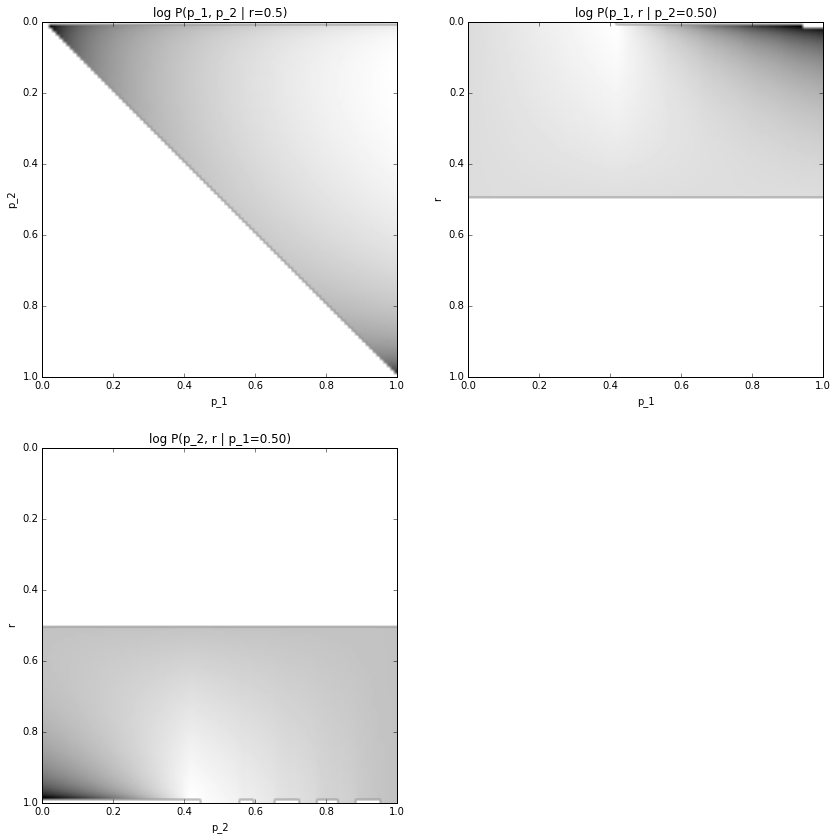

In [23]:
# Parametrised Plots
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.imshow(np.log(posterior_duo[:,:,50]), cmap='gray', extent=[0,1,1,0])
plt.xlabel("p_1")
plt.ylabel("p_2")
plt.title("log P(p_1, p_2 | r=0.5)")

plt.subplot(222)
plt.imshow(np.log(posterior_duo[:,50,:]), cmap='gray', extent=[0,1,1,0])
plt.xlabel("p_1")
plt.ylabel("r")
plt.title("log P(p_1, r | p_2=0.50)")

plt.subplot(223)
plt.imshow(np.log(posterior_duo[50,:,:]), cmap='gray', extent=[0,1,1,0])
plt.xlabel("p_2")
plt.ylabel("r")
plt.title("log P(p_2, r | p_1=0.50)")

/home/mfk/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: divide by zero encountered in log
/home/mfk/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:10: RuntimeWarning: divide by zero encountered in log
/home/mfk/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:16: RuntimeWarning: divide by zero encountered in log


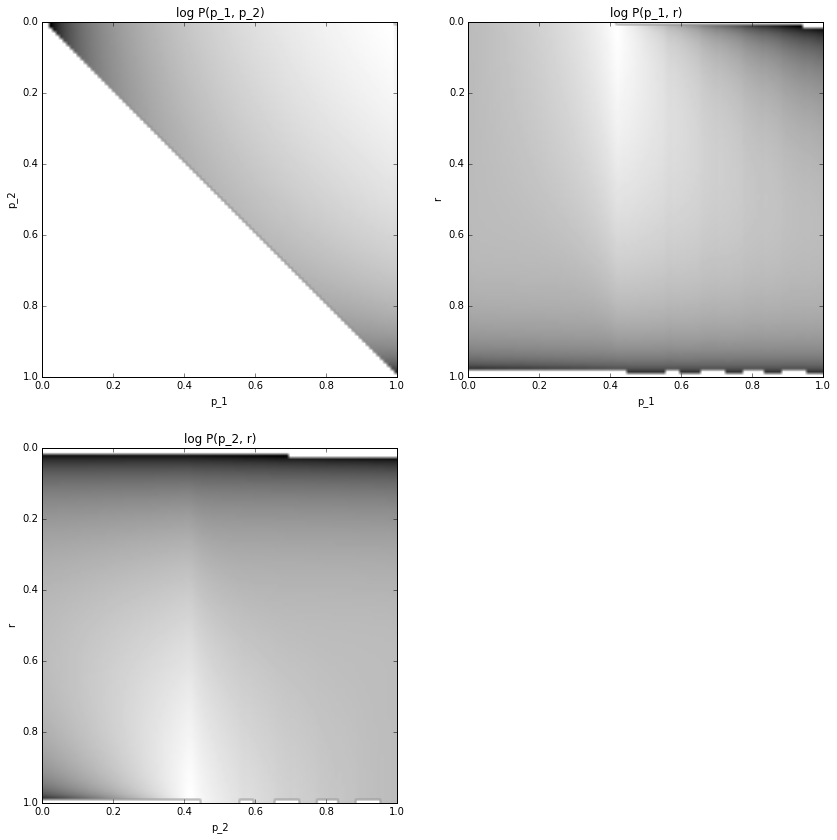

In [24]:
# Marginalised Plots
plt.figure(figsize=(14,14))
plt.subplot(221)
plt.imshow(np.log(posterior_duo.sum(axis=2)), cmap='gray', extent=[0,1,1,0])
plt.xlabel("p_1")
plt.ylabel("p_2")
plt.title("log P(p_1, p_2)")

plt.subplot(222)
plt.imshow(np.log(posterior_duo.sum(axis=1)), cmap='gray', extent=[0,1,1,0])
plt.xlabel("p_1")
plt.ylabel("r")
plt.title("log P(p_1, r)")

plt.subplot(223)
plt.imshow(np.log(posterior_duo.sum(axis=0)), cmap='gray', extent=[0,1,1,0])
plt.xlabel("p_2")
plt.ylabel("r")
plt.title("log P(p_2, r)")

**For better visualitation the log probabilities were used (which are also white for 0, but that shuld be clear from the context). In the plots we see our prior condition $p_1 < p_2$ in form of the triangle. If we fix one of the two p the other is restricted to be larger/smaller than the other which explains why the parametrised plots have horzontal lines above/below the proability density is 0. Apparently this model assigns most likeliood to situations where one coin has a high and the other a low p, which is not what we would expect or condiser resonable. In our intuiton we have the prior that both coins should have similar p. The most probable combination of this model is the maximum of the posterior with r marginalised out:**

In [25]:
p1_i , p2_i = np.unravel_index(posterior_duo.sum(axis=2).argmax(), posterior_duo.sum(axis=2).shape)
p1 = p1_grid[p1_i]
p2 = p2_grid[:,p2_i]
print p1, p2

[[[ 0.01]]] [[[ 0.99]]]


** The most probable combination is p_1=0.01 and p_2=0.99. In the following plot we can see that in the limits of $r$ to $0$ or $1$  everything depends on the one or the other coin alone an the probabilites for p of the other coin are indifferent:**

/home/mfk/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:3: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
/home/mfk/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: RuntimeWarning: divide by zero encountered in log


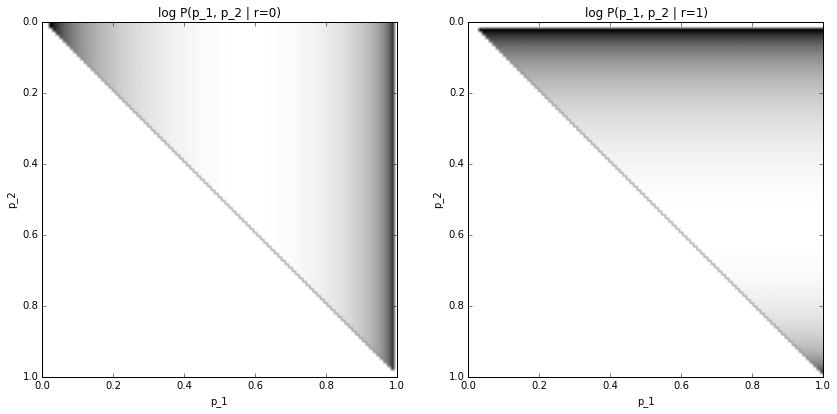

In [26]:
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.imshow(np.log(posterior_duo[:,:,0]), cmap='gray', extent=[0,1,1,0])
plt.xlabel("p_1")
plt.ylabel("p_2")
plt.title("log P(p_1, p_2 | r=0)")

plt.subplot(122)
plt.imshow(np.log(posterior_duo[:,:,-1]), cmap='gray', extent=[0,1,1,0])
plt.xlabel("p_1")
plt.ylabel("p_2")
plt.title("log P(p_1, p_2 | r=1)")

5) Based on your previous analyses, can you conclude whether one or two coin model is better? Explain.
** Apparently the two coin model suggests that the coins have very different p values which is not what we would expect from real coins. Therefore I conclude that this model is ill conditioned *unless* we incorporate another prior which reflects our expectations.**

6) You are now told that 2 coins were used, and that $p_2 = 0.8 \pm 0.01$. Which prior on $p_2$ should be considered given this piece of information and what does that mean for $P(p_1, p_2)$?  With this new prior, plot the new posterior distribution and discuss what you can infer about the two coins properties: $p_1$, $p_2$, $r$.

** For $p_2$ a beta prior of the respective mean and width should be used, $P(p_1, p_2)$ will change accordingly to put more mass around 0.8 for $p_2$ and at the same time "shift" the probability mass of $p_1$ in a way that the observed number of heads $k$ has still high likelihood (i.e. $p_1$ should more likely be lower than before). The beta prior is subject to the conditions the parameters: $\mu = 0.8 =  \frac{\alpha}{\alpha + \beta}=$ and $s=0.01=\sqrt{\frac{\alpha \beta}{(\alpha+\beta+1)(\alpha + \beta)^2}}$**

7) Let's suppose that instead of the information on $p_2$ you have learned that the tossing ratio $r$ is almost $1/3$. Therefore, with $N$ is the total number of tosses, we adopt a new prior on $r$: 
\begin{equation}
P(N \times r) \propto Poisson( \lambda = N/3)
\end{equation}
Justify this prior and with this precise information on $r$ and without the previous prior information on $p_2$, plot the new posterior distribution and tell whether you can tell about the two coins properties. Describe the differences with the previous case (question 6). 

8) Assuming you have now both $P(N\,r)$ and $P(p_2)$ from question 6 and 7, what value of $p_1$ and uncertainties do you get? Explain your steps.

9) Based on your analyses, do you think one piece of information is more important than another? Do you think you could disentangle if 3 coins were used? (no calculation is required, only write down your thoughts on this)